In [1]:
from utils.utils import train_valid_split, DataGenerator
import matplotlib.pyplot as plt
from matplotlib import gridspec
from PIL import Image

Using TensorFlow backend.


In [2]:
train_set, valid_set = train_valid_split()

Train
healthy 361
multiple_diseases 64
rust 435
scab 414
Valid
healthy 155
multiple_diseases 27
rust 187
scab 178


In [3]:
train_healthy = train_set.loc[train_set['healthy']==1]
train_multiple_diseases = train_set.loc[train_set['multiple_diseases']==1]
train_rust = train_set.loc[train_set['rust']==1]
train_scab = train_set.loc[train_set['scab']==1]

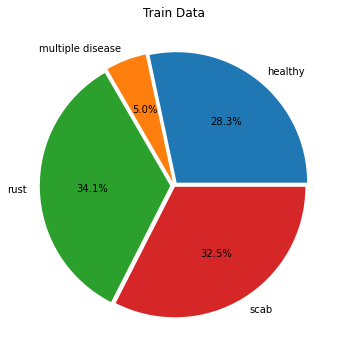

In [4]:
# data visualization
plt.figure(figsize=(6, 6))
label = ['healthy', 'multiple disease', 'rust', 'scab']
explode = [0.03, 0.03, 0.03, 0.01]
plt.pie([len(train_healthy), len(train_multiple_diseases), len(train_rust), len(train_scab)],
       labels=label,
       autopct='%.1f%%',
       explode=explode)
plt.title("Train Data")
plt.show()

In [5]:
valid_healthy = valid_set.loc[valid_set['healthy']==1]
valid_multiple_diseases = valid_set.loc[valid_set['multiple_diseases']==1]
valid_rust = valid_set.loc[valid_set['rust']==1]
valid_scab = valid_set.loc[valid_set['scab']==1]

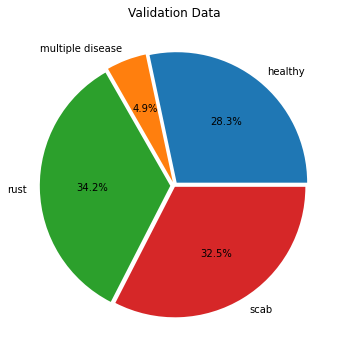

In [6]:
# data visualization
plt.figure(figsize=(6, 6))
label = ['healthy', 'multiple disease', 'rust', 'scab']
explode = [0.03, 0.03, 0.03, 0.01]
plt.pie([len(valid_healthy), len(valid_multiple_diseases), len(valid_rust), len(valid_scab)],
       labels=label,
       autopct='%.1f%%',
       explode=explode)
plt.title('Validation Data')
plt.show()

In [7]:
data_path = 'datasets/plant-pathology-2020-fgvc7/temp/valid'

def show_image(img_ids, col, rows=4, cols=3): 
    assert len(img_ids) <= rows*cols

    plt.figure(figsize=(15, 15)) 
    plt.title(col)
    grid = gridspec.GridSpec(rows, cols) 

    for idx, img_id in enumerate(img_ids):
        img_path = f'{data_path}/{col}/{img_id}.jpg' 
        image = Image.open(img_path)
        ax = plt.subplot(grid[idx])
        ax.imshow(image)

In [8]:
healthy_img_ids = valid_healthy.index[-12:]
multiple_diseases_img_ids = valid_multiple_diseases.index[-12:]
rust_img_ids = valid_rust.index[-12:]
scab_img_ids = valid_scab.index[-12:]

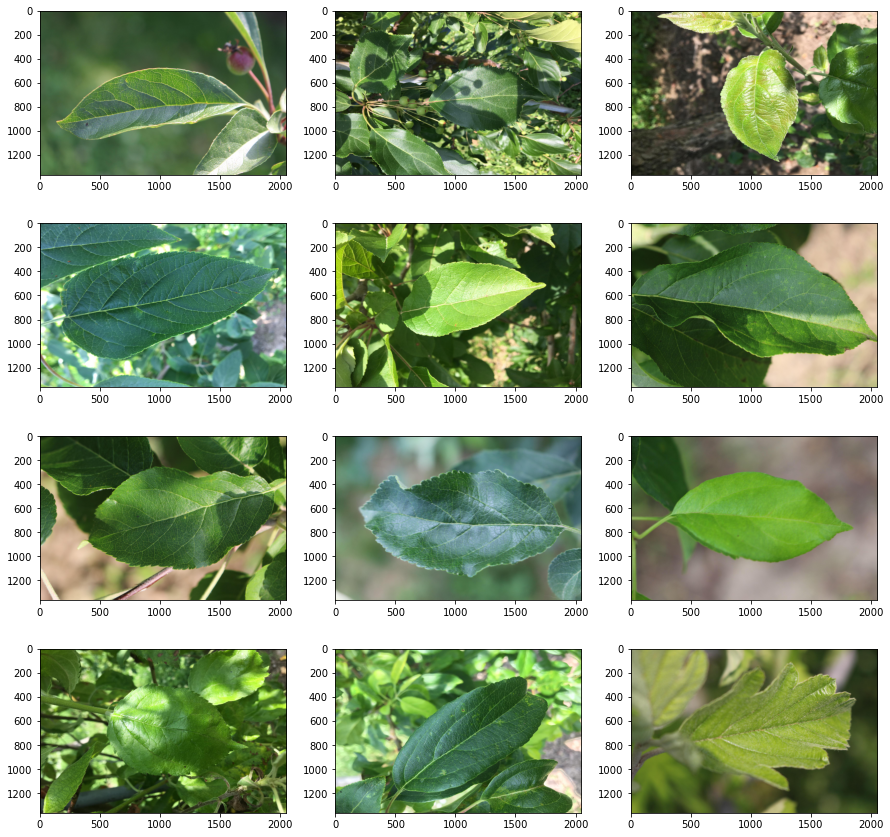

In [9]:
show_image(healthy_img_ids, 'healthy') # show healthy leaf

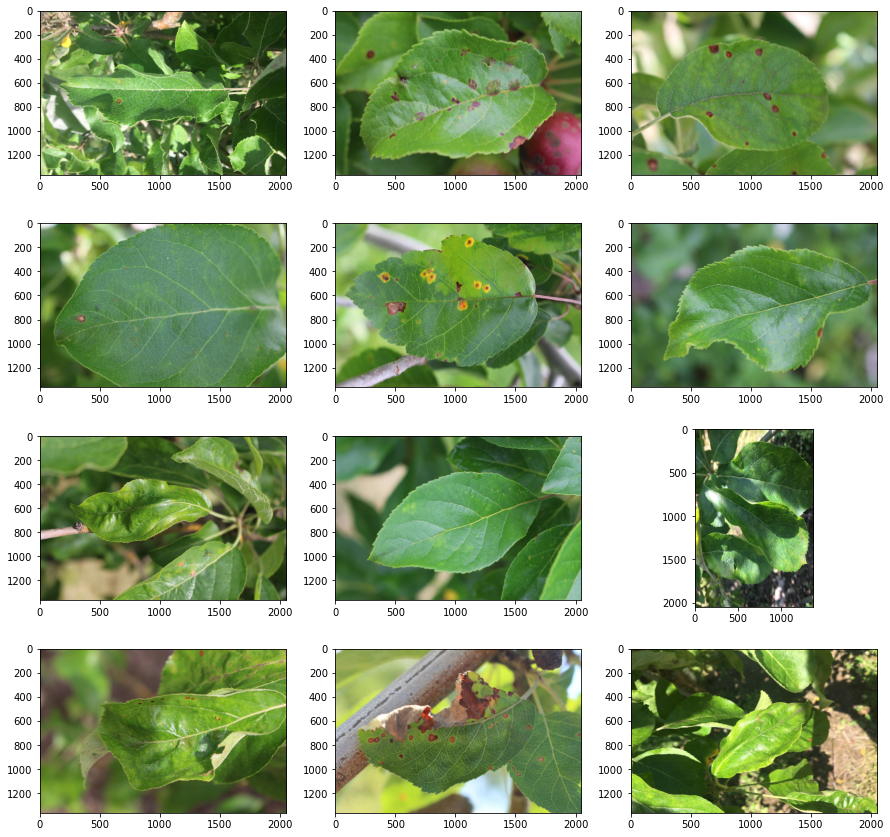

In [10]:
show_image(multiple_diseases_img_ids, 'multiple_diseases') # show multiple_diseases leaf

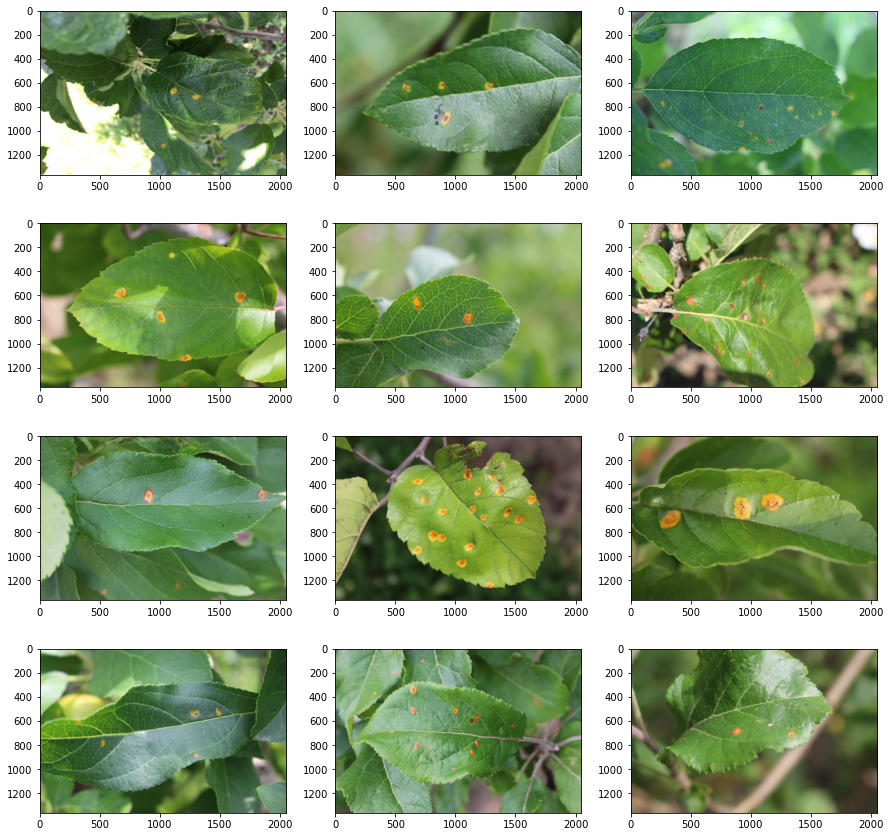

In [11]:
show_image(rust_img_ids, 'rust') # show rust_img leaf

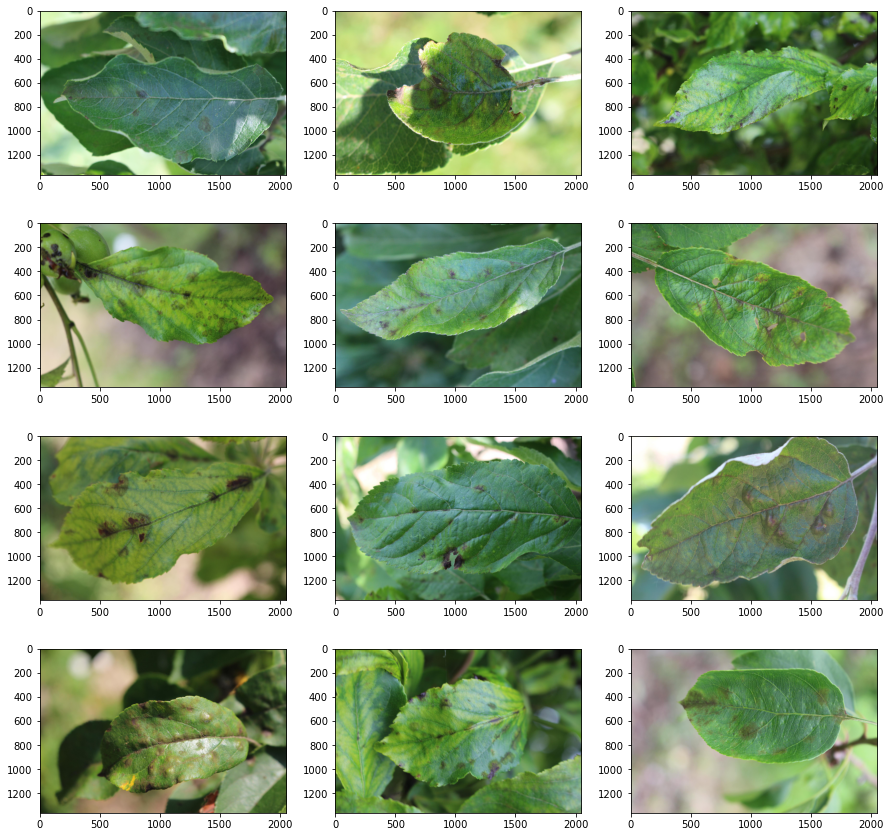

In [12]:
show_image(scab_img_ids, 'scab') # show scab leaf

In [13]:
train_generator, valid_generator = DataGenerator(batch_size = 32)

Found 1274 images belonging to 4 classes.
Found 547 images belonging to 4 classes.


In [14]:
train_generator.next()[1].shape

(32, 4)